In [14]:
# from https://www.learnpytorch.io/01_pytorch_workflow/

import torch
from torch import nn
import matplotlib.pyplot as plt

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias

10
10


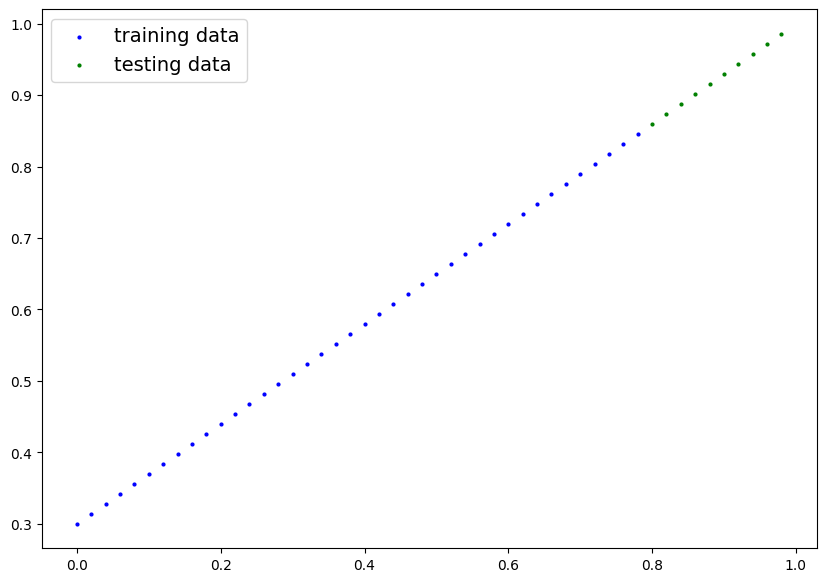

In [15]:
training_split = int(0.8 * len(X))
X_train, Y_train = X[:training_split], Y[:training_split]
X_test, Y_test = X[training_split:], Y[training_split:]

def PlotPredictions(train_data = X_train,
                    train_labels = Y_train,
                    test_data = X_test,
                    test_labels = Y_test,
                    predictions = None):
    print(len(test_data))
    print(len(test_labels))
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b",s=4, label="training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r",s=4, label="Predictions")

    plt.legend(prop={"size": 14})

PlotPredictions()

In [16]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # starting with random weights. Will change as model develops
                                                dtype=torch.float),
                                            requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1,
                                            dtype=torch.float), 
                                        requires_grad=True)
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias
                                        

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 
10
10


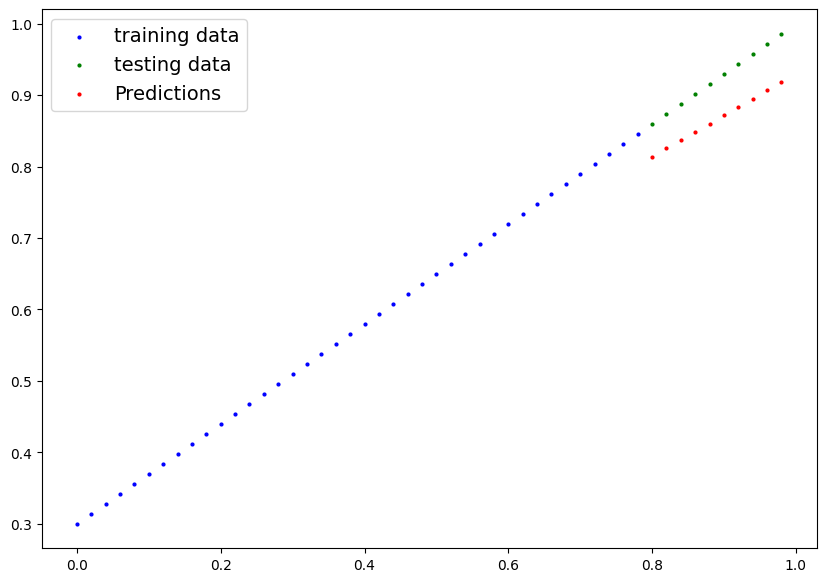

In [25]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

# Create the loss function
loss_function = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
Optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

epochs = 100 # times to pass over training data

train_loss_values = []
test_loss_values = []
epoch_count = []

epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_function(y_pred, Y_train)

    # 3. Zero grad of the optimizer
    Optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    Optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_function(test_pred, Y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

# Plot the loss curves
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  Y_preds = model_0(X_test)
PlotPredictions(predictions=Y_preds)
